<a href="https://colab.research.google.com/github/letsGoBharat/Speech-and-Speaker-Recognition/blob/master/HMM_Gaussian_Emissions/HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lab2_proto.py

In [0]:
#!pip install tools2
import numpy as np
#from tools2 import *

#DONE
def concatTwoHMMs(hmm1, hmm2):
    """ Concatenates 2 HMM models

    Args:
       hmm1, hmm2: two dictionaries with the following keys:
           name: phonetic or word symbol corresponding to the model
           startprob: M+1 array with priori probability of state
           transmat: (M+1)x(M+1) transition matrix
           means: MxD array of mean vectors
           covars: MxD array of variances

    D is the dimension of the feature vectors
    M is the number of emitting states in each HMM model (could be different for each)

    Output
       dictionary with the same keys as the input but concatenated models:
          startprob: K+1 array with priori probability of state
          transmat: (K+1)x(K+1) transition matrix
             means: KxD array of mean vectors
            covars: KxD array of variances

    K is the sum of the number of emitting states from the input models
   
    Example:
       twoHMMs = concatHMMs(phoneHMMs['sil'], phoneHMMs['ow'])

    See also: the concatenating_hmms.pdf document in the lab package
    """
    hmm = dict()
    startprob1 = hmm1['startprob']
    startprob2 = hmm2['startprob']
    transmat1 = hmm1['transmat']
    transmat2 = hmm2['transmat']
    means1 = hmm1['means']
    means2 = hmm2['means']
    covars1 = hmm1['covars']
    covars2 = hmm2['covars']

    # build concatenated startprob

    startprob1ext = np.append(startprob1,  np.tile(startprob1[-1], (1, startprob2.size - 1)))
    startprob2ext = np.concatenate((np.ones(startprob1.size - 1), startprob2))

    hmm["startprob"] = np.multiply(startprob1ext, startprob2ext)

    # build transition matrix

    transmat1ext = np.append(transmat1[:-1, :],  np.tile(transmat1[:-1, [-1]], (1, startprob2.size - 1)), 1)

    startrep2 = np.tile(startprob2, (startprob1.size - 1, 1))
    startrep2ext = np.concatenate((np.ones((startprob1.size - 1, startprob1.size - 1)), startrep2), axis = 1)

    firsthalf = np.multiply(transmat1ext, startrep2ext)
    secondhalf = np.concatenate((np.zeros((startprob2.size, startprob1.size - 1)), transmat2), axis = 1)

    hmm["transmat"] = np.concatenate((firsthalf, secondhalf))

    # build means matrix

    hmm["means"] = np.concatenate((means1, means2))

    # build covariances matrix

    hmm["covars"] = np.concatenate((covars1, covars2))

    return hmm
    

# this is already implemented, but based on concat2HMMs() above
def concatHMMs(hmmmodels, namelist):
    """ Concatenates HMM models in a left to right manner

    Args:
       hmmmodels: dictionary of models indexed by model name. 
       hmmmodels[name] is a dictionaries with the following keys:
           name: phonetic or word symbol corresponding to the model
           startprob: M+1 array with priori probability of state
           transmat: (M+1)x(M+1) transition matrix
           means: MxD array of mean vectors
           covars: MxD array of variances
       namelist: list of model names that we want to concatenate

    D is the dimension of the feature vectors
    M is the number of emitting states in each HMM model (could be
      different in each model)

    Output
       combinedhmm: dictionary with the same keys as the input but
                    combined models:
         startprob: K+1 array with priori probability of state
          transmat: (K+1)x(K+1) transition matrix
             means: KxD array of mean vectors
            covars: KxD array of variances

    K is the sum of the number of emitting states from the input models

    Example:
       wordHMMs['o'] = concatHMMs(phoneHMMs, ['sil', 'ow', 'sil'])
    """
    concat = hmmmodels[namelist[0]]
    for idx in range(1,len(namelist)):
        concat = concatTwoHMMs(concat, hmmmodels[namelist[idx]])
    return concat


def gmmloglik(log_emlik, weights):
    """Log Likelihood for a GMM model based on Multivariate Normal Distribution.

    Args:
        log_emlik: array like, shape (N, K).
            contains the log likelihoods for each of N observations and
            each of K distributions
        weights:   weight vector for the K components in the mixture

    Output:
        gmmloglik: scalar, log likelihood of data given the GMM model.
    """

def forward(log_emlik, log_startprob, log_transmat):
    """Forward (alpha) probabilities in log domain.

    Args:
        log_emlik: NxM array of emission log likelihoods, N frames, M states
        log_startprob: log probability to start in state i
        log_transmat: log transition probability from state i to j

    Output:
        forward_prob: NxM array of forward log probabilities for each of the M states in the model
    """
    alpha = np.empty((log_emlik.shape[0], log_emlik.shape[1]))
    alpha[0] = log_startprob[0:-1] + log_emlik[0, :]
    print(log_transmat[:, 0])
    print(alpha.shape[0])
    for i in range (1, alpha.shape[0]):
      alpha[i] = logsumexp(alpha[i - 1] + log_transmat[:-1, i])

    return alpha

def backward(log_emlik, log_startprob, log_transmat):
    """Backward (beta) probabilities in log domain.

    Args:
        log_emlik: NxM array of emission log likelihoods, N frames, M states
        log_startprob: log probability to start in state i
        log_transmat: transition log probability from state i to j

    Output:
        backward_prob: NxM array of backward log probabilities for each of the M states in the model
    """

def viterbi(log_emlik, log_startprob, log_transmat, forceFinalState=True):
    """Viterbi path.

    Args:
        log_emlik: NxM array of emission log likelihoods, N frames, M states
        log_startprob: log probability to start in state i
        log_transmat: transition log probability from state i to j
        forceFinalState: if True, start backtracking from the final state in
                  the model, instead of the best state at the last time step

    Output:
        viterbi_loglik: log likelihood of the best path
        viterbi_path: best path
    """

def statePosteriors(log_alpha, log_beta):
    """State posterior (gamma) probabilities in log domain.

    Args:
        log_alpha: NxM array of log forward (alpha) probabilities
        log_beta: NxM array of log backward (beta) probabilities
    where N is the number of frames, and M the number of states

    Output:
        log_gamma: NxM array of gamma probabilities for each of the M states in the model
    """

def updateMeanAndVar(X, log_gamma, varianceFloor=5.0):
    """ Update Gaussian parameters with diagonal covariance

    Args:
         X: NxD array of feature vectors
         log_gamma: NxM state posterior probabilities in log domain
         varianceFloor: minimum allowed variance scalar
    were N is the lenght of the observation sequence, D is the
    dimensionality of the feature vectors and M is the number of
    states in the model

    Outputs:
         means: MxD mean vectors for each state
         covars: MxD covariance (variance) vectors for each state
    """


lab2_tools.py

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def logsumexp(arr, axis=0):
    """Computes the sum of arr assuming arr is in the log domain.
    Returns log(sum(exp(arr))) while minimizing the possibility of
    over/underflow.
    """
    arr = np.rollaxis(arr, axis)
    # Use the max to normalize, as with the log this is what accumulates
    # the less errors
    vmax = arr.max(axis=0)
    if vmax.ndim > 0:
        vmax[~np.isfinite(vmax)] = 0
    elif not np.isfinite(vmax):
        vmax = 0
    with np.errstate(divide="ignore"):
        out = np.log(np.sum(np.exp(arr - vmax), axis=0))
        out += vmax
        return out

def log_multivariate_normal_density_diag(X, means, covars):
    """Compute Gaussian log-density at X for a diagonal model

    Args:
        X: array like, shape (n_observations, n_features)
        means: array like, shape (n_components, n_features)
        covars: array like, shape (n_components, n_features)

    Output:
        lpr: array like, shape (n_observations, n_components)
    From scikit-learn/sklearn/mixture/gmm.py
    """
    n_samples, n_dim = X.shape
    lpr = -0.5 * (n_dim * np.log(2 * np.pi) + np.sum(np.log(covars), 1)
                  + np.sum((means ** 2) / covars, 1)
                  - 2 * np.dot(X, (means / covars).T)
                  + np.dot(X ** 2, (1.0 / covars).T))
    return lpr

def plot_colormesh(input):
    plt.pcolormesh(input.T)
    plt.show()

prondict.py

In [0]:
prondict = {} 
prondict['o'] = ['ow']
prondict['z'] = ['z', 'iy', 'r', 'ow']
prondict['1'] = ['w', 'ah', 'n']
prondict['2'] = ['t', 'uw']
prondict['3'] = ['th', 'r', 'iy']
prondict['4'] = ['f', 'ao', 'r']
prondict['5'] = ['f', 'ay', 'v']
prondict['6'] = ['s', 'ih', 'k', 's']
prondict['7'] = ['s', 'eh', 'v', 'ah', 'n']
prondict['8'] = ['ey', 't']
prondict['9'] = ['n', 'ay', 'n']


py2mat.py

In [0]:
from scipy.io import savemat
import numpy as np
import sys

if sys.version_info.major==3:
    models = np.load('lab2_models_python3.npz')['models']
    example = np.load('lab2_example_python3.npz')['example'].item()
    savemat('lab2_models.mat', models)
    savemat('lab2_example.mat', example)
else:
    models = np.load('lab2_models.npz')['models']
    example = np.load('lab2_example.npz')['example'].item()
    savemat('lab2_models.mat', models)
    savemat('lab2_example.mat', example)


main.py

['ah', 'ao', 'ay', 'eh', 'ey', 'f', 'ih', 'iy', 'k', 'n', 'ow', 'r', 's', 'sil', 'sp', 't', 'th', 'uw', 'v', 'w', 'z']
True
[[0.8379803  0.1620197  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.9121278  0.08787217 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.7891916  0.2108084  0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.809113   0.190887   0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.8904182  0.1095818
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.861858
  0.1381421  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.8379803  0.1620197  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.9121278  0.08787217 0.        ]
 [0.   

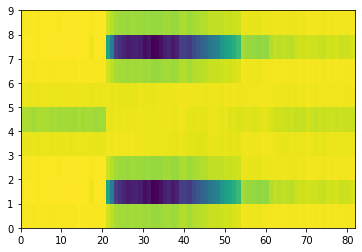

'o' repetition b


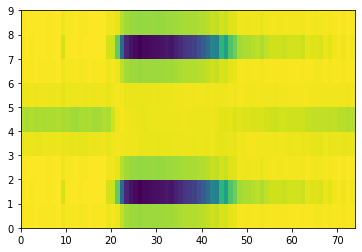

[-0.17676069        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


array([[-86.36124739,         -inf,         -inf,         -inf,
                -inf,         -inf,         -inf,         -inf,
                -inf],
       [-86.36124739, -86.36124739, -86.36124739, -86.36124739,
        -86.36124739, -86.36124739, -86.36124739, -86.36124739,
        -86.36124739],
       [-84.16402281, -84.16402281, -84.16402281, -84.16402281,
        -84.16402281, -84.16402281, -84.16402281, -84.16402281,
        -84.16402281],
       [-81.96679823, -81.96679823, -81.96679823, -81.96679823,
        -81.96679823, -81.96679823, -81.96679823, -81.96679823,
        -81.96679823],
       [-79.76957365, -79.76957365, -79.76957365, -79.76957365,
        -79.76957365, -79.76957365, -79.76957365, -79.76957365,
        -79.76957365],
       [-77.57234908, -77.57234908, -77.57234908, -77.57234908,
        -77.57234908, -77.57234908, -77.57234908, -77.57234908,
        -77.57234908],
       [-75.3751245 , -75.3751245 , -75.3751245 , -75.3751245 ,
        -75.3751245 , -75.3751

In [0]:
import numpy as np
data = np.load('lab2_data.npz', allow_pickle=True)['data']
 
phoneHMMs_all = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
phoneHMMs_ones = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()

print(list(sorted(phoneHMMs_ones.keys())))

isolated = {}
wordHMMs = {}
for digit in prondict.keys():
  isolated[digit] = ['sil'] + prondict[digit] + ['sil']
  
wordHMMs['o'] = concatHMMs(phoneHMMs_ones, isolated['o'])

print(np.allclose(log_multivariate_normal_density_diag(example['lmfcc'], wordHMMs['o']['means'], wordHMMs['o']['covars']), example['obsloglik']))
print(wordHMMs['o']['transmat'])


print("\'o\' repetition a")
plot_colormesh(log_multivariate_normal_density_diag(data[0]['lmfcc'], wordHMMs['o']['means'], wordHMMs['o']['covars']))
print("\'o\' repetition b")
plot_colormesh(log_multivariate_normal_density_diag(data[1]['lmfcc'], wordHMMs['o']['means'], wordHMMs['o']['covars']))

forward(example['obsloglik'], np.log(wordHMMs['o']['startprob']), np.log(wordHMMs['o']['transmat']))